In [2]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

# Affine Subspaces

The [`binalg`](https://q1ss.readthedocs.io/en/latest/api/q1ss.binalg.html) module contains the binary (i.e. mod 2) linear algebra primitives used by this library, including:

- the [`binvec`](https://q1ss.readthedocs.io/en/latest/api/q1ss.binalg.binvec.html#binvec) class, used to create and manipulate binary vectors.
- the [`binmat`](https://q1ss.readthedocs.io/en/latest/api/q1ss.binalg.binmat.html#binmat) class, used to create and manipulate binary matrices.


In [3]:
from q1ss.binalg import binvec, binmat

The [`AffineSubspace`](https://q1ss.readthedocs.io/en/latest/api/q1ss.binalg.affine.html#affinesubspace) class can be used to create and transform affine subspaces of binary vector fields.

In [4]:
from q1ss.binalg import AffineSubspace

Affine subspaces are encoded using the following data:

- a binary matrix whose rows generate the underlying linear subspace
- a binary vector acting as basepoint (the zero vector, if the subspace is linear)

Subspaces can be [canonicalised](https://q1ss.readthedocs.io/en/latest/api/q1ss.binalg.affine.html#q1ss.binalg.affine.AffineSubspace.canonicalize): the generator matrix is put in [RREF](https://en.wikipedia.org/wiki/Row_echelon_form#Reduced_row_echelon_form) removing any vanishing rows, so that its rows become a basis for the underlying linear space. The basepoint is also canonicalised, by shifting it to the unique point in the subspace which is zero at the pivot positions for the RREF basis matrix.


A simple example is given the standard linear subspace with given subspace dimension within a vector space of given ambient dimension:

In [5]:
AffineSubspace.std(2, 5)
#     subspace dim ^  ^ ambient dim

AffineSubspace(
  binmat([[1, 0, 0, 0, 0],
          [0, 1, 0, 0, 0]]),
  binvec([0, 0, 0, 0, 0])
)

More generally, standard affine subspaces are those with an `m`-dim underlying standard linear subspace and a basepoint which is zero over the first `m` components. These are the subspaces used in the [Explicit](#explicit-construction) and [Sequence](#sequence-construction) constructions of affine partition functions below.

In [6]:
AffineSubspace.std(2, 5, binvec([0, 0, 1, 1, 0]))

AffineSubspace(
  binmat([[1, 0, 0, 0, 0],
          [0, 1, 0, 0, 0]]),
  binvec([0, 0, 1, 1, 0])
)

A larger example of a random subspace, geneated using random RREF binary matrix sampling:

In [7]:
AffineSubspace.random(5, 10, rng=1) # fixed random seed, for reproducibility

AffineSubspace(
  binmat([[1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
          [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
          [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]),
  binvec([0, 0, 0, 0, 0, 1, 0, 1, 0, 1])
)

Affine subspaces can be visualised using the `draw` method (requires [matplotlib](`https://matplotlib.org/`) and [NetworkX](`https://networkx.org/`)):

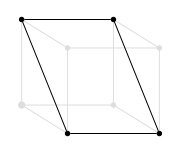

In [8]:
# A 2-dim affine subspace of 3-dim binary vector space:
subsp = AffineSubspace.random(2, 3, rng=8)
# 2D vectors to use when plotting the 3 dimensions:
axes3d = [
    [0, 1],      # dimension 0
    [1, 0],      # dimension 1
    [1/2, -1/3], # dimension 2
]
# Draw the subspace:
plt.figure(figsize=(3, 2.5))
subsp.draw(axes3d)
plt.axis("off")
plt.show()

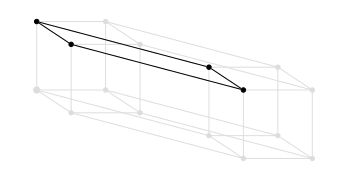

In [9]:
# A 2-dim affine subspace of 4-dim binary vector space:
subsp = AffineSubspace.random(2, 4, rng=4)
# 2D vectors to use when plotting the 4 dimensions:
axes4d = [
    [0, 1],      # dimension 0
    [1, 0],      # dimension 1
    [1/2, -1/3], # dimension 2
    [5/2, -2/3],   # dimension 3
]
# Draw the subspace:
plt.figure(figsize=(6, 3))
subsp.draw(axes4d)
plt.axis("off")
plt.show()

# Affine Partition Functions

The [`ap`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.html) module contains concrete implementations of affine partition functions, a candidate family of equivocal hash functions originally proposed by ["One-shot Signatures and Applications to Hybrid Quantum/Classical Authentication"](https://eprint.iacr.org/2020/107).

Partition functions are subclasses of the abstract base class [`AP`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.base.html#ap). They expose a common API to:

- Access the subspace with a given label, via the method [`__getitem__`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.base.html#q1ss.ap.base.AP.__getitem__), i.e. using `[]` access syntax.
- Compute the label of a given vector, via the method [`label`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.base.html#q1ss.ap.base.AP.label).
- Determine whether a given vector is orthogonal to the subspace with given label, via the method [`is_ortho`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.base.html#q1ss.ap.base.AP.is_ortho)


For example, consider a partition consisting of 4-dim subspaces of 10-dim binary vector space.

In [191]:
from q1ss.ap import SeqAP
ap = SeqAP.random(4, 10, rng=0)

Extracting the 6-dim label associated to a 10-dim binary vector:

In [179]:
v = binvec.random(10, rng=17)
l = ap.label(v)
print(f"Vector {v.bin} has label {l.bin}.")

Vector 0111010101 has label 100100.


Extracting the subspace for the label, and explicitly checking that the vector is in the subspace:

In [192]:
ap[l]

AffineSubspace(
  binmat([[1, 0, 1, 1, 1, 1, 0, 0, 1, 1],
          [0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
          [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
          [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]]),
  binvec([1, 0, 1, 0, 0, 1, 1, 0, 0, 1])
)

In [193]:
v in ap[l]

True

Checking whether some other vector is orthogonal to the subspace, i.e. whether it has zero inner product (mod 2) with all basis vectors for the underlying linear subspace:

In [189]:
u = binvec([1, 0, 0, 1, 0, 0, 0, 0, 1, 1])
ap.is_ortho(u, l)

True

In [190]:
ap[l].basis @u

binvec([0, 0, 0, 0])

## Explicit Construction

The [`ExplicitAP`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.explicit.html#explicitap) class can be used to construct affine partition functions explicitly, in terms of a complete family of disjoint affine subspaces with same dimension.

In [10]:
from q1ss.ap import ExplicitAP

In [11]:
ap = ExplicitAP.random(2, 3, rng=11)

In [12]:
subspaces = [AffineSubspace(
   binmat([[1, 0, 1]]),
   binvec([0, 0, 0])
 ),
 AffineSubspace(
   binmat([[0, 0, 1]]),
   binvec([0, 1, 0])
 ),
 AffineSubspace(
   binmat([[0, 1, 0]]),
   binvec([1, 0, 0])
 ),
 AffineSubspace(
   binmat([[1, 1, 0]]),
   binvec([0, 0, 1])
 )]

In [13]:
ap = ExplicitAP(subspaces)
ap

<ExplicitAP: 3-dim space, 1-dim subspaces, 2-dim labels>

We can use the [`draw`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.base.html#q1ss.ap.base.AP.draw) method to display the subspaces in an affine partition:

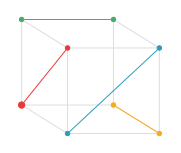

In [14]:
ap = ExplicitAP.random(1, 3, rng=11)
subsp_colors = ["#eb3837", "#faac16", "#43ae6a", "#299eb8",]
plt.figure(figsize=(3, 2.5))
ap.draw(axes3d, colors=subsp_colors)
plt.axis("off")
plt.show()

Same partition, now indicating the binary vectors in 3-dim space:

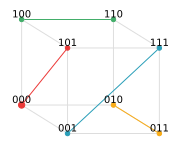

In [15]:
def strvec(v: binvec) -> str:
    return "".join(map(str, v))

plt.figure(figsize=(3, 2.5))
ap.draw(
    axes3d, colors=subsp_colors,
    label=strvec, font_size=10, verticalalignment="bottom"
)
plt.axis("off")
plt.show()

Same partition, now indicating the binary vectors in 3-dim space and the label (aka the hash) assigned to them by the partition:

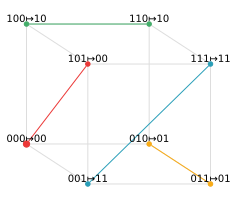

In [16]:
plt.figure(figsize=(4, 3.5))
ap.draw(
    axes3d, colors=subsp_colors,
    label=lambda v: strvec(v)+"↦"+strvec(ap.label(v)),
    font_size=10, verticalalignment="bottom"
)
plt.axis("off")
plt.show()

## Generator Construction

The [`GenAP`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.generated.html#genap) class can be used to construct affine partition functions in terms of an invertible binary matrix generator. 

In [17]:
from q1ss.ap import GenAP

Subclasses of the abstract [`APMatrixGen`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.generated.html#apmatrixgen) class implement the logic for generating invertible binary matrices from partial labels.

In [18]:
from q1ss.ap import APMatrixGen

At present, only three generators are implemented:

- The trivial generator [`EyeAPMatrixGen`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.generated.html#eyeapmatrixgen), for identity matrices. Accessible from the static method [`APMatrixGen.eye`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.generated.html#q1ss.ap.generated.APMatrixGen.eye).
- The pseudo-random generator [`RandomAPMatrixGen`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.generated.html#randomapmatrixgen), currently implemented using NumPy and unsuitable for circuit compilation. Accessible from the static method [`APMatrixGen.random`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.generated.html#q1ss.ap.generated.APMatrixGen.random).
- The generator [`SeqAPMatrixGen`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.sequence.html#seqapmatrixgen) associated to the [Sequence Construction](#sequence-construction) below.

In a future release, it will be possible to create generators based on arbitrary binary circuits, and the NumPy implementation of [`RandomAPMatrixGen`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.generated.html#randomapmatrixgen) will be replaced by one or more families of pseudo-random matrix generators.

### Identity Matrix Generator

Given a `k`-dim label, the [`EyeAPMatrixGen`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.generated.html#eyeapmatrixgen) generator for ambient dimension `n` outputs the `(n-k)`-by-`(n-k)` identity matrix (together with its inverse, which is the identity matrix itself):

In [19]:
APMatrixGen.eye(4)
#   ambient dim ^ 

<EyeAPMatrixGen: 4-dim space, up to 3-dim labels>

In [20]:
gen = APMatrixGen.eye(4)
labels = [
    binvec([]),
    binvec([1]),
    binvec([1, 0]),
    binvec([1, 1]),
    binvec([1, 0, 1]),
]
for label in labels:
    print(f"Identity matrix for {label = }:")
    mat, mat_inv = gen(label)
    print(mat)
    print()


Identity matrix for label = binvec([]):
binmat([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])

Identity matrix for label = binvec([1]):
binmat([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

Identity matrix for label = binvec([1, 0]):
binmat([[1, 0],
        [0, 1]])

Identity matrix for label = binvec([1, 1]):
binmat([[1, 0],
        [0, 1]])

Identity matrix for label = binvec([1, 0, 1]):
binmat([[1]])



An affine partition based on an identity matrix generator consists of the cosest of a standard linear subspace with given dimension:

In [21]:
GenAP(2, APMatrixGen.eye(4))
#     ^ subsp dim        ^ ambient dim

<GenAP: 4-dim space, 2-dim subspaces, 2-dim labels>

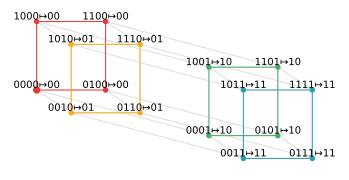

In [22]:
ap = GenAP(2, APMatrixGen.eye(4))
plt.figure(figsize=(6, 3))
ap.draw(
    axes4d, colors=subsp_colors,
    label=lambda v: strvec(v)+"↦"+strvec(ap.label(v)),
    font_size=10, verticalalignment="bottom"
)
plt.axis("off")
plt.show()

The construction of the affine partition starts with a single affine subspace, spanning the whole space. As the label dimension increases&mdash;i.e. as the subspace dimension decreases&mdash;each subspace in the partition is divided into two subspaces of equal dimension, in a "direction" determined by the matrix associated by the generator to the subspace label.

The identity matrix generator makes the division process clearly visible: because the matrices all act trivially, the division happens along sucessive coordinate axes (starting from the last and working backwards). 

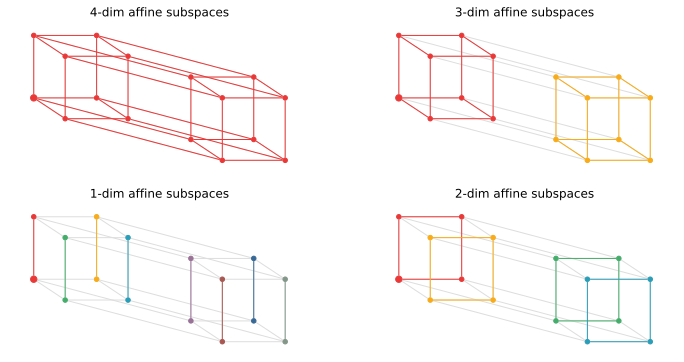

In [23]:
subsp_colors = [
    "#eb3837", "#faac16", "#43ae6a", "#299eb8",
    "#9A7197", "#376996", "#A85751", "#839788",
]
gen = APMatrixGen.eye(4)
plt.figure(figsize=(12, 6))
for m in [4, 3, 2, 1]:
    plt.subplot(2, 2, [3, 4, 2, 1][m-1])
    plt.title(f"{m}-dim affine subspaces")
    ap = GenAP(m, gen)
    ap.draw(
        axes4d, colors=subsp_colors
    )
    plt.axis("off")
plt.show()

### Random Matrix Generator

Given a `k`-dim label, the [`RandomAPMatrixGen`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.generated.html#randomapmatrixgen) generator for ambient dimension `n` outputs a pseudo-random `(n-k)`-by-`(n-k)` invertible matrix, together with its inverse:

In [24]:
APMatrixGen.random(4, seed=0)

<RandomAPMatrixGen: 4-dim space, up to 3-dim labels>

In [25]:
gen = APMatrixGen.random(4, seed=0)
labels = [
    binvec([]),
    binvec([1]),
    binvec([1, 0]),
    binvec([1, 1]),
    binvec([1, 0, 1]),
]
for label in labels:
    print(f"Pair of matrix and inverse for {label = }:")
    mat, mat_inv = gen(label)
    print(mat)
    print(mat_inv)
    print()

Pair of matrix and inverse for label = binvec([]):
binmat([[1, 0, 1, 1],
        [1, 0, 0, 1],
        [1, 1, 0, 1],
        [0, 1, 0, 1]])
binmat([[0, 0, 1, 1],
        [0, 1, 1, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 1]])

Pair of matrix and inverse for label = binvec([1]):
binmat([[1, 0, 0],
        [0, 1, 1],
        [1, 1, 0]])
binmat([[1, 0, 0],
        [1, 0, 1],
        [1, 1, 1]])

Pair of matrix and inverse for label = binvec([1, 0]):
binmat([[1, 1],
        [0, 1]])
binmat([[1, 1],
        [0, 1]])

Pair of matrix and inverse for label = binvec([1, 1]):
binmat([[1, 1],
        [1, 0]])
binmat([[0, 1],
        [1, 1]])

Pair of matrix and inverse for label = binvec([1, 0, 1]):
binmat([[1]])
binmat([[1]])



An affine partition based on a pseudo-random matrix generator consists&mdash;with probability approaching 1 as the label dimension grows large&mdash;of subspaces that are not cosets of each other:

In [26]:
GenAP(2, APMatrixGen.random(4, seed=0))

<GenAP: 4-dim space, 2-dim subspaces, 2-dim labels>

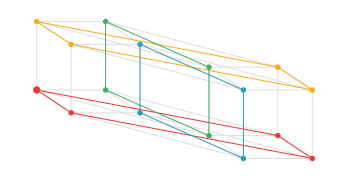

In [27]:
ap = GenAP(2, APMatrixGen.random(4, seed=0))
plt.figure(figsize=(6, 3))
ap.draw(
    axes4d, colors=subsp_colors,
)
plt.axis("off")
plt.show()

The pseudo-random matrix generator makes it possible to see both the division process and the transformations that mix the spaces.

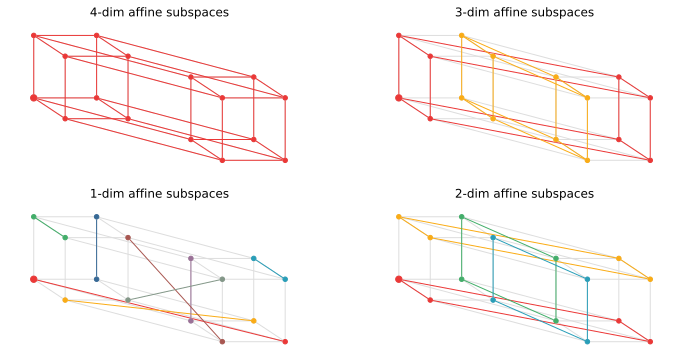

In [28]:
subsp_colors = [
    "#eb3837", "#faac16", "#43ae6a", "#299eb8",
    "#9A7197", "#376996", "#A85751", "#839788",
]
gen = APMatrixGen.random(4, seed=0)
plt.figure(figsize=(12, 6))
for m in [4, 3, 2, 1]:
    plt.subplot(2, 2, [3, 4, 2, 1][m-1])
    plt.title(f"{m}-dim affine subspaces")
    ap = GenAP(m, gen)
    ap.draw(
        axes4d, colors=subsp_colors
    )
    plt.axis("off")
plt.show()

To understand how the subspace associated to each label is obtained, let's draw the 2-dim example above with subspace labels:

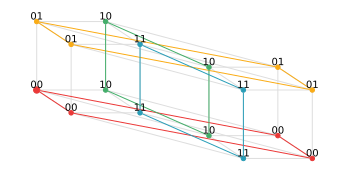

In [29]:
ap = GenAP(2, APMatrixGen.random(4, seed=0))
plt.figure(figsize=(6, 3))
ap.draw(
    axes4d, colors=subsp_colors,
    label=lambda v: strvec(ap.label(v)),
    font_size=10, verticalalignment="bottom"
)
plt.axis("off")
plt.show()

Each subspace is constructed by taking the 2-dim standard linear subspace, constructing a coset based on the label, and then transforming the resulting affine subspace using the matrices associated to initial segments of the label, going backwards from `label[:-1]` to the empty binary vector `label[:0]`.

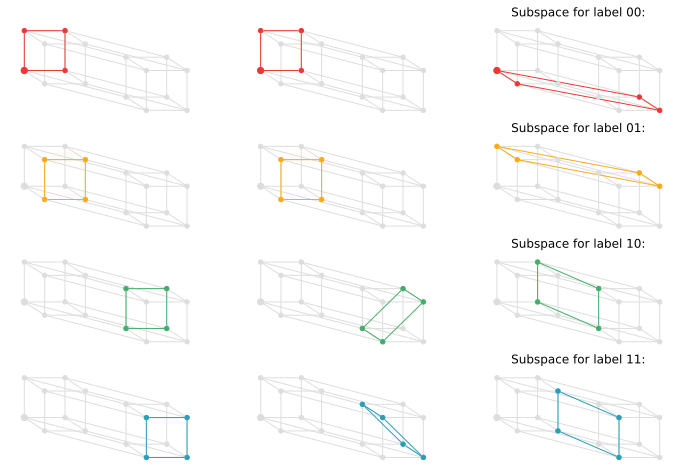

In [30]:
gen = APMatrixGen.random(4, seed=0)
plt.figure(figsize=(12, 8))
for i in range(4):
    label = binvec.from_int(i, 2)
    subsp = AffineSubspace.std(2, 4, binvec.zeros(2)|label[::-1])
    for j in range(0, 3):
        plt.subplot(4, 3, 3*i+j+1)
        if j == 2:    
            plt.title(f"Subspace for label {label.bin}:")
        subsp.draw(axes4d, color=subsp_colors[i])
        mat, mat_inv = gen(label[:-1-j])
        subsp = subsp.transform(mat_inv, partial=True)
        plt.axis("off")
plt.show()

## Sequence Construction

The [`SeqAP`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.sequence.html#seqap) class can be used to construct affine partition functions in terms of two sequences of invertible binary matrices.

The construction of subspaces is the same of [`GenAP`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.generated.html#genap), but the matrices used only depend on the length of the partial labels and their last bit. 

In [195]:
from q1ss.ap import SeqAP

The [`SeqAPData`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.sequence.html#seqapdata) class can be used to assemble and validate the data required to construct a [`SeqAP`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.sequence.html#seqap) instance.

In [196]:
from q1ss.ap import SeqAPData

In [197]:
data = SeqAPData.random(1, 4, rng=0)
data

The matrix associated to the empty partial label is stored as `start`, and its inverse as `start_inv`:

In [198]:
data.start

binmat([[1, 0, 1, 1],
        [1, 0, 0, 1],
        [1, 1, 0, 1],
        [0, 1, 0, 1]])

In [199]:
data.start_inv

binmat([[0, 0, 1, 1],
        [0, 1, 1, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 1]])

The matrices used for non-empty partial labels with final bit 0 are stored in the sequence `mats0`, and their inverses in the sequence `mats0_inv`:

In [200]:
data.mats0

(binmat([[0, 0, 1],
         [0, 1, 1],
         [1, 0, 1]]),
 binmat([[0, 1],
         [1, 1]]))

In [201]:
data.mats0_inv

(binmat([[1, 0, 1],
         [1, 1, 0],
         [1, 0, 0]]),
 binmat([[1, 1],
         [1, 0]]))

The matrices used for non-empty partial labels with final bit 1 are stored in the sequence `mats1`, and their inverses in the sequence `mats1_inv`:

In [202]:
data.mats1

(binmat([[1, 0, 1],
         [1, 1, 1],
         [1, 1, 0]]),
 binmat([[0, 1],
         [1, 0]]))

In [82]:
data.mats1_inv

(binmat([[1, 1, 1],
         [1, 1, 0],
         [0, 1, 1]]),
 binmat([[0, 1],
         [1, 0]]))

The [`SeqAP`](https://q1ss.readthedocs.io/en/latest/api/q1ss.ap.sequence.html#seqap) instance is constructed directly from this data:

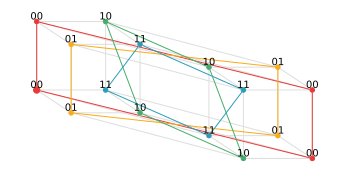

In [205]:
data = SeqAPData.random(2, 4, rng=0)
ap = SeqAP(data)
plt.figure(figsize=(6, 3))
ap.draw(
    axes4d, colors=subsp_colors,
    label=lambda v: strvec(ap.label(v)),
    font_size=10, verticalalignment="bottom"
)
plt.axis("off")
plt.show()

A bigger example of 8 3-dim subspaces in 6-dim binary vector space:

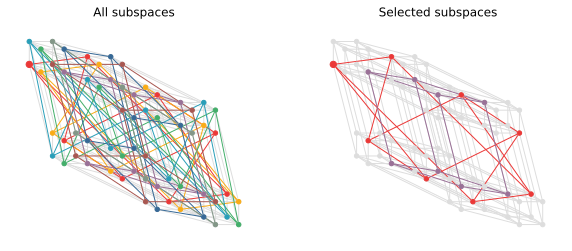

In [265]:
axes8d = [
    [0, 1],
    [1, 0],
    [1/2, -1/3],
    [5/2, -2/3],
    [1, -4],
    [4, -2],
]
data = SeqAPData.random(3, 6, rng=4)
ap = SeqAP(data)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("All subspaces")
ap.draw(axes8d, colors=subsp_colors)
plt.axis("off")
plt.subplot(1, 2, 2)
selected = [0, 4]
plt.title("Selected subspaces")
AffineSubspace.draw_many(
    axes8d,
    [ap[j] for j in selected],
    colors=[subsp_colors[j] for j in selected]
)
plt.axis("off")
plt.show()